In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt   

import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc 

In [197]:
df1 = pd.read_csv("cubic_zirconia.csv")
df2 = pd.read_csv("Holiday_Package.csv") 

# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [3]:
df1.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [4]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [6]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
table,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


In [7]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
df1.shape

(26967, 10)

In [9]:
dups = df1.duplicated()
print(f"Number of duplicate rows = {dups.sum()}")

Number of duplicate rows = 34


# EDA
## Univariate

In [10]:
print('Range of values: ', df1['carat'].max()-df1['carat'].min())

Range of values:  4.3


In [11]:
print('Minimum carat: ', df1['carat'].min())
print('Maximum carat: ',df1['carat'].max())
print('Mean value: ', df1['carat'].mean())
print('Median value: ',df1['carat'].median())
print('Standard deviation: ', df1['carat'].std())
print('Null values: ',df1['carat'].isnull().any())

Minimum carat:  0.2
Maximum carat:  4.5
Mean value:  0.7983754218118336
Median value:  0.7
Standard deviation:  0.47774547354501284
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


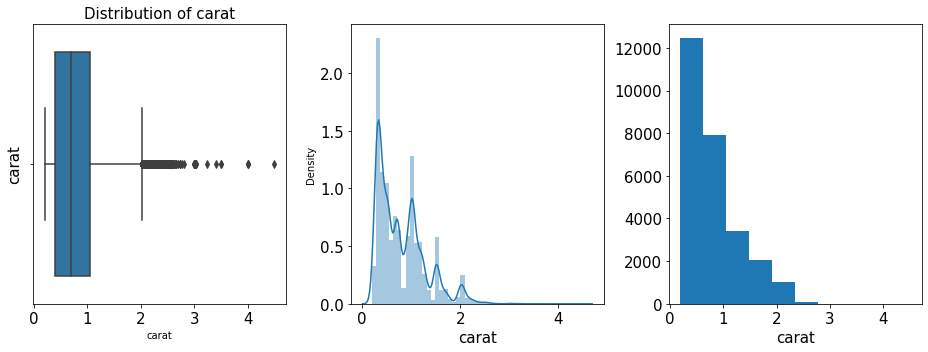

In [12]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='carat',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('carat', fontsize=15)
ax1.set_title('Distribution of carat', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['carat'],ax=ax2)
ax2.set_xlabel('carat', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['carat'])
ax3.set_xlabel('carat', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [13]:
print('Range of values: ', df1['depth'].max()-df1['depth'].min())

Range of values:  22.799999999999997


In [14]:
print('Minimum depth: ', df1['depth'].min())
print('Maximum depth: ',df1['depth'].max())
print('Mean value: ', df1['depth'].mean())
print('Median value: ',df1['depth'].median())
print('Standard deviation: ', df1['depth'].std())
print('Null values: ',df1['depth'].isnull().any())

Minimum depth:  50.8
Maximum depth:  73.6
Mean value:  61.745146555006194
Median value:  61.8
Standard deviation:  1.4128602381425932
Null values:  True


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


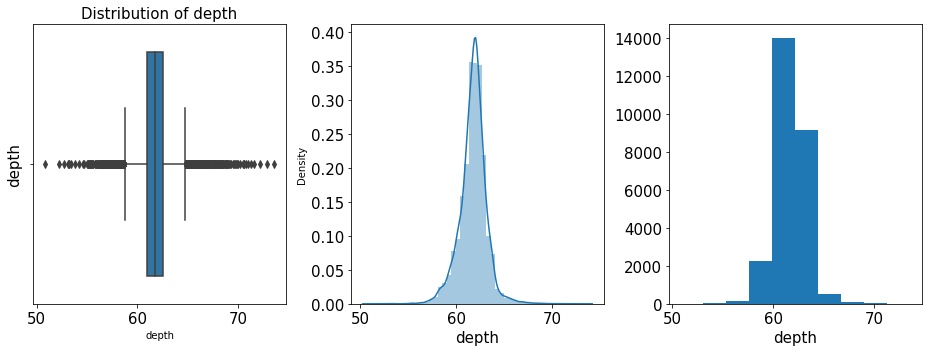

In [15]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='depth',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('depth', fontsize=15)
ax1.set_title('Distribution of depth', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['depth'],ax=ax2)
ax2.set_xlabel('depth', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['depth'])
ax3.set_xlabel('depth', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


In [16]:
df1['depth'] = np.where(df1['depth'].isnull() == True , df1['depth'].mean(), df1['depth'] ) 

In [17]:
print('Range of values: ', df1['table'].max()-df1['table'].min())

Range of values:  30.0


In [18]:
print('Minimum table: ', df1['table'].min())
print('Maximum table: ',df1['table'].max())
print('Mean value: ', df1['table'].mean())
print('Median value: ',df1['table'].median())
print('Standard deviation: ', df1['table'].std())
print('Null values: ',df1['table'].isnull().any())

Minimum table:  49.0
Maximum table:  79.0
Mean value:  57.45607965290908
Median value:  57.0
Standard deviation:  2.2320679090295075
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


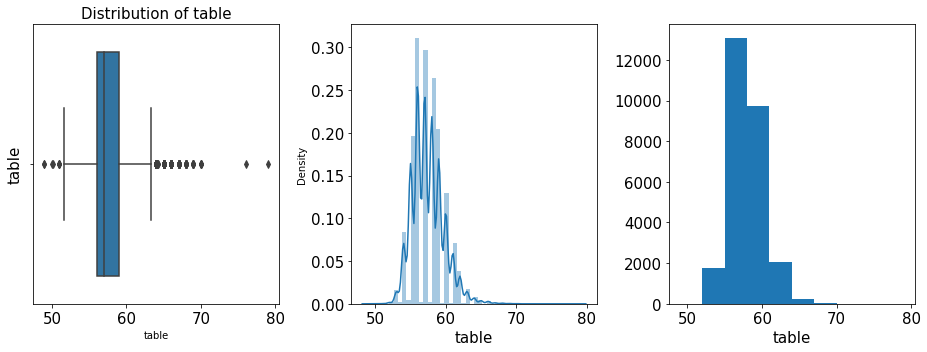

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='table',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('table', fontsize=15)
ax1.set_title('Distribution of table', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['table'],ax=ax2)
ax2.set_xlabel('table', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['table'])
ax3.set_xlabel('table', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [20]:
print('Range of values: ', df1['x'].max()-df1['x'].min())

Range of values:  10.23


In [21]:
print('Minimum x: ', df1['x'].min())
print('Maximum x: ',df1['x'].max())
print('Mean value: ', df1['x'].mean())
print('Median value: ',df1['x'].median())
print('Standard deviation: ', df1['x'].std())
print('Null values: ',df1['x'].isnull().any())

Minimum x:  0.0
Maximum x:  10.23
Mean value:  5.729853524678309
Median value:  5.69
Standard deviation:  1.1285163776477767
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


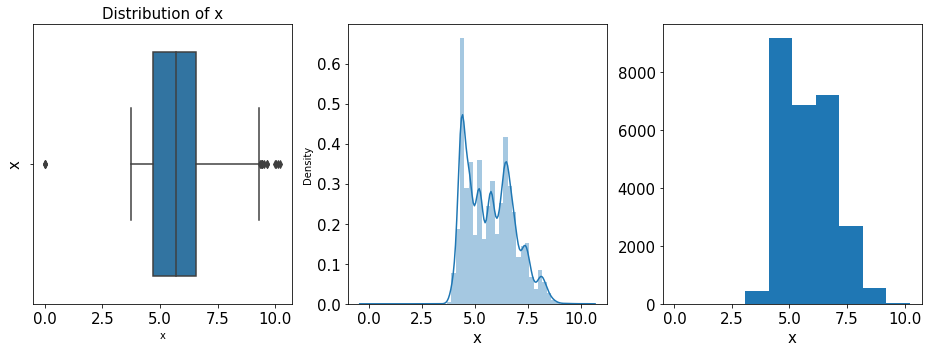

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='x',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('x', fontsize=15)
ax1.set_title('Distribution of x', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['x'],ax=ax2)
ax2.set_xlabel('x', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['x'])
ax3.set_xlabel('x', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [23]:
print('Range of values: ', df1['y'].max()-df1['y'].min())

Range of values:  58.9


In [24]:
print('Minimum y: ', df1['y'].min())
print('Maximum y: ',df1['y'].max())
print('Mean value: ', df1['y'].mean())
print('Median value: ',df1['y'].median())
print('Standard deviation: ', df1['y'].std())
print('Null values: ',df1['y'].isnull().any())

Minimum y:  0.0
Maximum y:  58.9
Mean value:  5.733568806318799
Median value:  5.71
Standard deviation:  1.1660575299260496
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


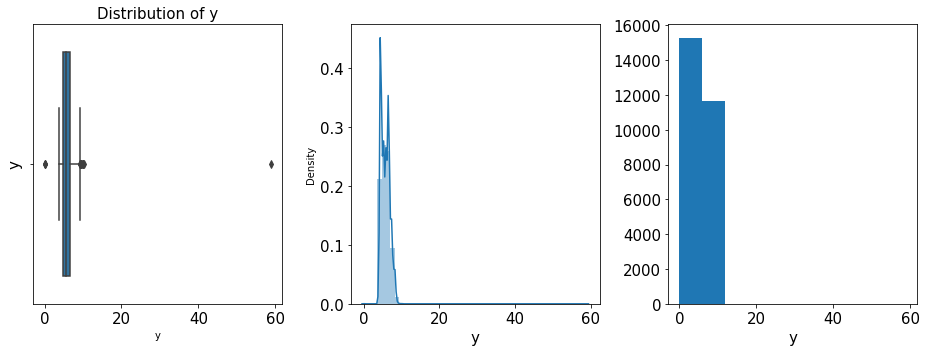

In [25]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='y',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('y', fontsize=15)
ax1.set_title('Distribution of y', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['y'],ax=ax2)
ax2.set_xlabel('y', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['y'])
ax3.set_xlabel('y', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [26]:
print('Range of values: ', df1['z'].max()-df1['z'].min())

Range of values:  31.8


In [27]:
print('Minimum z: ', df1['z'].min())
print('Maximum z: ',df1['z'].max())
print('Mean value: ', df1['z'].mean())
print('Median value: ',df1['z'].median())
print('Standard deviation: ', df1['z'].std())
print('Null values: ',df1['z'].isnull().any())

Minimum z:  0.0
Maximum z:  31.8
Mean value:  3.5380572551637184
Median value:  3.52
Standard deviation:  0.7206236256427411
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


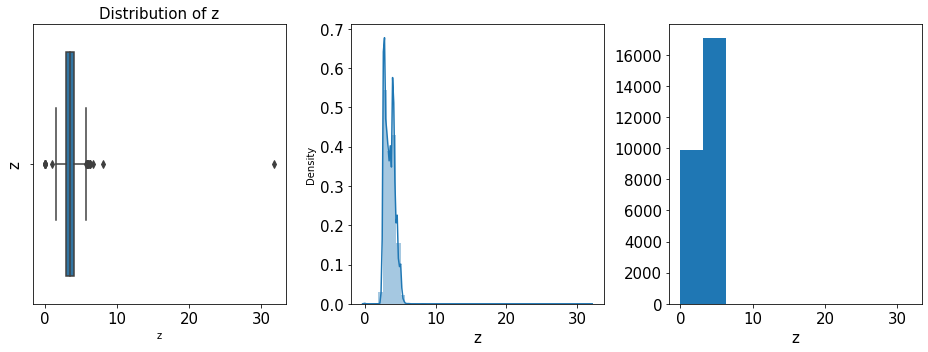

In [28]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='z',data=df1,orient='v',ax=ax1)
ax1.set_ylabel('z', fontsize=15)
ax1.set_title('Distribution of z', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df1['z'],ax=ax2)
ax2.set_xlabel('z', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df1['z'])
ax3.set_xlabel('z', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

<AxesSubplot:>

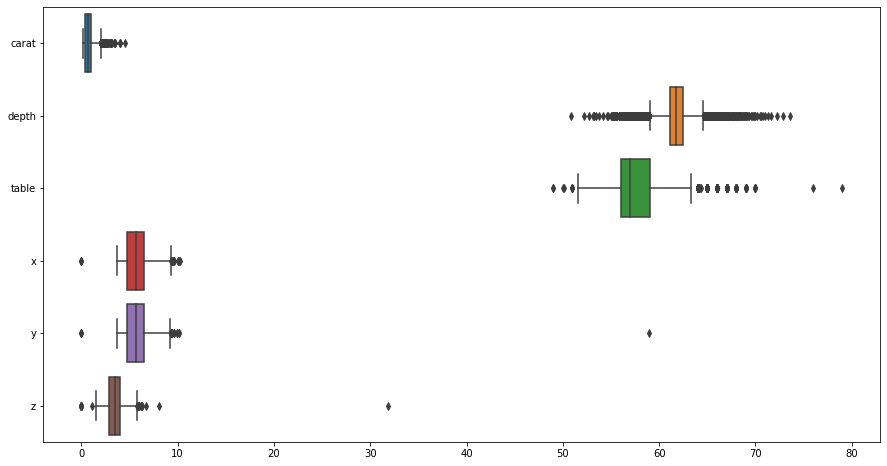

In [29]:
plt.figure(figsize=(15,8))  #Almost every features have outliers in it. We will treat them later.
sns.boxplot(data=df1[['carat','depth','table','x','y','z']] , orient='h')

<AxesSubplot:>

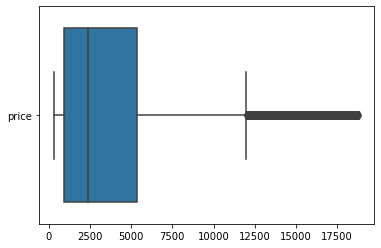

In [30]:
sns.boxplot(data=df1[['price']] , orient='h') 
#DV price has many outliers as well.

In [31]:
#  skewness values quantitatively
df1.skew().sort_values(ascending=False)

y        3.850189
z        2.568257
price    1.618550
carat    1.116481
table    0.765758
x        0.387986
depth   -0.028995
dtype: float64

## Categorical variables:

C:\Users\randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

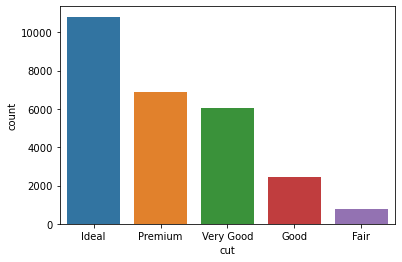

In [32]:
sns.countplot(df1['cut'],order=df1['cut'].value_counts().index) # No. of Ideal zirconia has most numbers

C:\Users\randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

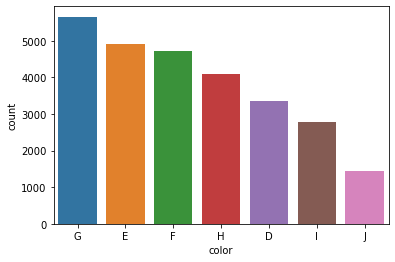

In [33]:
sns.countplot(df1['color'],order=df1['color'].value_counts().index) 
#G color zirconia is most in abundance. Followed by E & F respectively.
#With D being the best and J the worst.

C:\Users\randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

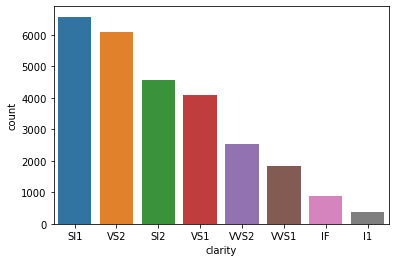

In [34]:
# Zirconia with Clarity corresponding to SI1 is most in number. Followed by VS2 and SI2
#Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. 
#In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
sns.countplot(df1['clarity'],order=df1['clarity'].value_counts().index)

## Multivariate Analysis

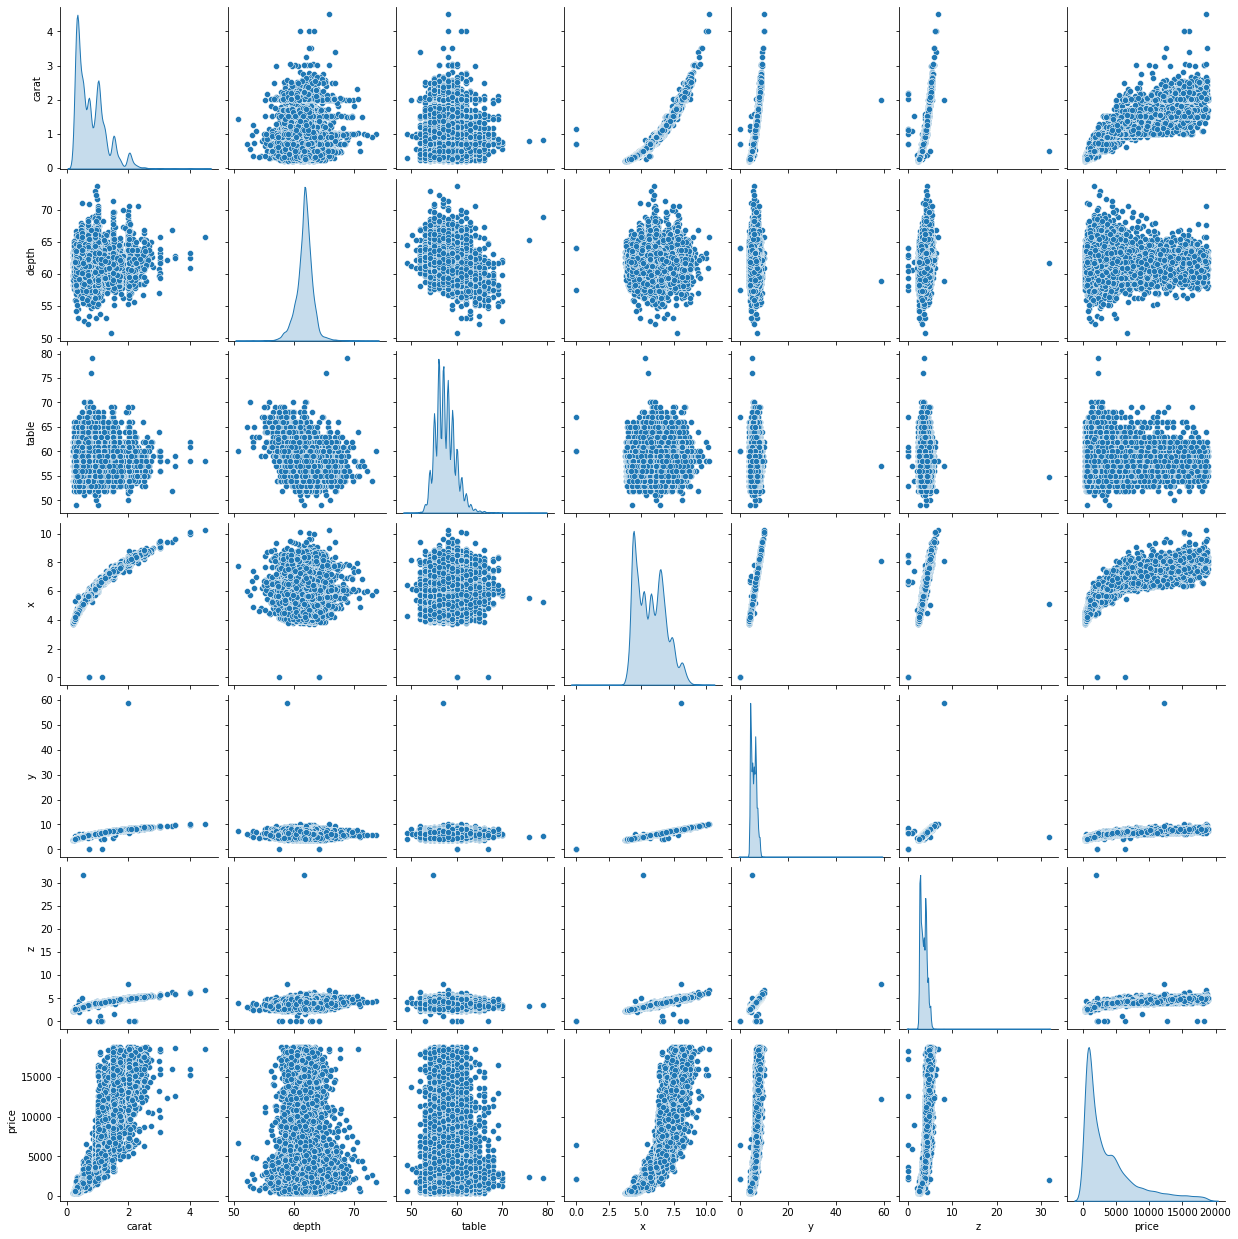

In [35]:
sns.pairplot(data=df1, diag_kind='kde')
#Point to be noted by looking at the pairplot
#1- There's a high correlation between independent variables such as x,y,z . This may create multicollinearity problem.
#2- There's a high linear correlation between dependent variables and independent variables. Except for depth and table.
#3- Variables such as depth , table , x are normally distributed. Other variables have skewness in it.

<AxesSubplot:>

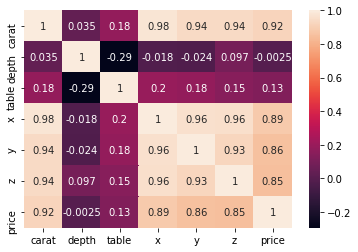

In [36]:
sns.heatmap(df1.corr(),annot=True)
#1)By looking at heatmap, we can further confirm the inferences that we made above. Correlations between DV price and IV ,
#carat,x,y,z are high. 
#2) Few of the above mentioned IV have high correlations between them.This may create a multicollinearity issue while creating
#model

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [37]:
for col in df1.columns:
    count=(df1[col] == 0).sum()
    print ('Number of zero values for the {} is {}'.format(col,count))

Number of zero values for the carat is 0
Number of zero values for the cut is 0
Number of zero values for the color is 0
Number of zero values for the clarity is 0
Number of zero values for the depth is 0
Number of zero values for the table is 0
Number of zero values for the x is 3
Number of zero values for the y is 3
Number of zero values for the z is 9
Number of zero values for the price is 0


In [38]:
#There are records which have zeroes in it. It's an error value and has to be treated as well. As x,y,z cannot be zero for
#any zirconia as it defines length,breadth,height respectively.
df1[df1['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [39]:
#There are records for column z which has zeroes in it. This values can be accepted  as these records have x,y values which
#shows that these zirconia might be a thin sheet, hence height field is mentioned as zero. 
#But for the sake of calculation purpose we will going to impute all the x,y,z columns with their respective mean values,
df1[df1['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [40]:
df1['x']=np.where(df1['x'] == 0,df1['x'].mean(),df1['x'])
df1['y']=np.where(df1['y'] == 0,df1['y'].mean(),df1['y'])
df1['z']=np.where(df1['z'] == 0,df1['z'].mean(),df1['z'])
#Impute X,Y,Z columns with respective columns mean where ever the values are zero.

In [41]:
#We will treat all the outliers by considering the distribution to be normally distributed and pulling back all the values
#withing the range of -3 to +3 Standard Deviation if any value is outside the range. 

from scipy.stats import zscore

In [42]:
for col in df1.columns:  #Applying Zscore on those columns which are not object type
    if df1[col].dtype != 'object':
        df1[[col]] = df1[[col]].apply(zscore)

In [43]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        print('Records greater than 3 standard deviation for column {} is {}'.format(col,df1[df1[col] > 3][col].count()))
        print('Records less than -3 standard deviation column {} is {}'.format(col,df1[df1[col] < -3][col].count()))

#Counting number of records for each variable which are greater than and less than 3 & -3 respectively.

Records greater than 3 standard deviation for column carat is 202
Records less than -3 standard deviation column carat is 0
Records greater than 3 standard deviation for column depth is 195
Records less than -3 standard deviation column depth is 170
Records greater than 3 standard deviation for column table is 180
Records less than -3 standard deviation column table is 4
Records greater than 3 standard deviation for column x is 16
Records less than -3 standard deviation column x is 0
Records greater than 3 standard deviation for column y is 13
Records less than -3 standard deviation column y is 0
Records greater than 3 standard deviation for column z is 15
Records less than -3 standard deviation column z is 1
Records greater than 3 standard deviation for column price is 582
Records less than -3 standard deviation column price is 0


In [44]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        df1[[col]] = np.where(df1[[col]] > 3, 3,df1[[col]])
        df1[[col]] = np.where(df1[[col]] < -3, -3, df1[[col]] )
        
#pulling back all the values withing the range of -3 to +3 Standard Deviation if any value is outside the range. 

In [45]:
for col in df1.columns:
    if df1[col].dtype != 'object':
        print('Records greater than 3 standard deviation for column {} is {}'.format(col,df1[df1[col] > 3][col].count()))
        print('Records less than -3 standard deviation column {} is {}'.format(col,df1[df1[col] < -3][col].count()))

#No such records present.

Records greater than 3 standard deviation for column carat is 0
Records less than -3 standard deviation column carat is 0
Records greater than 3 standard deviation for column depth is 0
Records less than -3 standard deviation column depth is 0
Records greater than 3 standard deviation for column table is 0
Records less than -3 standard deviation column table is 0
Records greater than 3 standard deviation for column x is 0
Records less than -3 standard deviation column x is 0
Records greater than 3 standard deviation for column y is 0
Records less than -3 standard deviation column y is 0
Records greater than 3 standard deviation for column z is 0
Records less than -3 standard deviation column z is 0
Records greater than 3 standard deviation for column price is 0
Records less than -3 standard deviation column price is 0


In [46]:
#Changing datatype from Object to numeric and assigining a codes for each category

for col in df1.columns: 
    if df1[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df1[col].unique()))
        print(pd.Categorical(df1[col].unique()).codes)
        df1[col] = pd.Categorical(df1[col]).codes



Column Name: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


Column Name: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


Column Name: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


In [47]:
df1.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043201,2,1,2,0.254475,0.243689,-1.296053,-1.240230,-1.225069,-0.854832
1,-0.980405,3,3,1,-0.677789,0.243689,-1.162942,-1.094241,-1.169336,-0.734329
2,0.212721,4,1,7,0.326187,1.139736,0.274661,0.331305,0.335461,0.583753
3,-0.792017,2,2,4,-0.104088,-0.652358,-0.807978,-0.802262,-0.807070,-0.709979
4,-1.022269,2,2,6,-0.964639,0.691712,-1.225060,-1.120004,-1.239003,-0.785263
5,0.463905,2,0,5,-0.175801,-0.652358,0.647373,0.649047,0.628060,1.382055
6,0.442973,1,4,2,1.401876,1.139736,0.549758,0.485882,0.683794,0.222740
7,-0.624561,3,1,2,-0.175801,2.035782,-0.568378,-0.578983,-0.584137,-0.627242
8,0.861614,1,4,2,1.473588,2.931829,0.878099,0.769274,1.004260,0.364611
9,-0.938541,2,2,5,-0.892927,-0.204334,-1.074201,-0.974014,-1.085736,-0.803400


In [48]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  int8   
 2   color    26967 non-null  int8   
 3   clarity  26967 non-null  int8   
 4   depth    26967 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 1.5 MB


# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [49]:
X=df1.drop('price',axis=1)  
Y=df1.pop('price')
#Separating Dependent and Independent Variable in X and Y variables

In [50]:
clf=LinearRegression()

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.30,random_state=0)

In [52]:
clf.fit(X_train,y_train)

LinearRegression()

In [53]:
for idx,col_name in enumerate(X_train.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf.coef_[idx]))

The coefficient for carat  is 1.4836192853139354 
The coefficient for cut  is 0.009047385078917823 
The coefficient for color  is -0.06850690194834504 
The coefficient for clarity  is 0.06967514363446227 
The coefficient for depth  is -0.03456802492987976 
The coefficient for table  is -0.048497123303384376 
The coefficient for x  is -0.7301350656346718 
The coefficient for y  is 0.4466943355168739 
The coefficient for z  is -0.19667738759196302 


In [54]:
intercept=clf.intercept_
intercept

-0.11158015121069696

In [55]:
clf.score(X_train,y_train)

0.9023698386105842

In [56]:
clf.score(X_test,y_test)
#Overall accuracy score of Training and Testing Data is similar.

0.9017535199834061

# STATSMODEL

In [57]:
data_train=pd.concat([X_train,y_train],axis=1)
#Calculating same using STATSMODEL

In [58]:
data_train.info()
data_train.head()
#Imported correctly 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18876 entries, 24457 to 2732
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    18876 non-null  float64
 1   cut      18876 non-null  int8   
 2   color    18876 non-null  int8   
 3   clarity  18876 non-null  int8   
 4   depth    18876 non-null  float64
 5   table    18876 non-null  float64
 6   x        18876 non-null  float64
 7   y        18876 non-null  float64
 8   z        18876 non-null  float64
 9   price    18876 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 1.2 MB


,carat,cut,color,clarity,depth,table,x,y,z,price
24457,0.212721,4,3,5,-2.327178,0.691712,0.549758,0.537408,0.251861,0.135282
15925,0.924410,2,3,2,0.684750,-0.652358,1.028959,0.958201,1.073926,0.242617
1946,3.000000,4,6,4,-1.538340,1.139736,2.644044,2.607025,2.327924,3.000000
13229,-1.105997,2,3,3,0.397900,-1.100381,-1.411416,-1.334694,-1.322603,-0.889119
9897,0.003401,2,4,2,-0.534364,-0.204334,0.301283,0.228253,0.196128,-0.278653


In [59]:
import statsmodels.formula.api as smf

In [60]:
lm_train = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y + z ',data=data_train).fit()

In [61]:
lm_train.params

Intercept   -0.111580
carat        1.483619
cut          0.009047
color       -0.068507
clarity      0.069675
depth       -0.034568
table       -0.048497
x           -0.730135
y            0.446694
z           -0.196677
dtype: float64

In [62]:
#Here are the following observations :-
#1) R-square and Adjusted R-sqaure is giving us the good results.
#2) P values for all the variables are within significance level
print(lm_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.937e+04
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:05:01   Log-Likelihood:                -4444.6
No. Observations:               18876   AIC:                             8909.
Df Residuals:                   18866   BIC:                             8988.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1116      0.009    -12.867      0.0

In [63]:
mse_test=np.mean((clf.predict(X_test)-y_test)**2)
mse_train=np.mean(clf.predict(X_train)-y_train)**2
#Calculating Mean Squared Error
print('MSE for training is {} and testing is {}'.format(mse_train,mse_test))

MSE for training is 1.4176336778420113e-33 and testing is 0.09170851041562096


In [64]:
import math

In [65]:
print('Root mean squared error for training is {} and Testing is {}'.format(math.sqrt(mse_train),math.sqrt(mse_test)))

Root mean squared error for training is 3.765147643641629e-17 and Testing is 0.3028341302026919


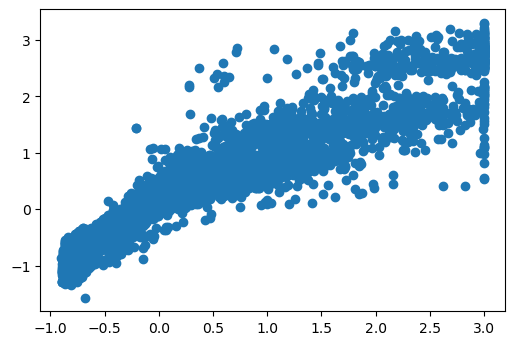

In [66]:
y_pred=clf.predict(X_test)
plt.rcParams['figure.dpi']=100
plt.scatter(y_test,y_pred)

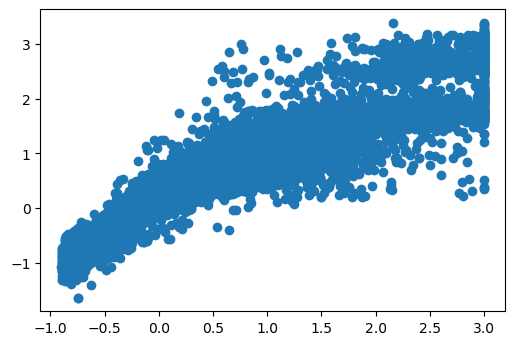

In [67]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_train,clf.predict(X_train))

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Calculation of Variance Inflation Factor

In [69]:
#df1[['carat','cut','color','clarity','depth','table','x']]
vif=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]

In [70]:
#for column in df1[['carat','cut','color','clarity','depth','table','x']].columns:
i=0
for column in X.columns:
    if i < 9:
        print (column , "---> ", vif[i])
        i=i+1
        
#As we can observe there is multicollinearity present between the data. VIF should be less than 5 for each variables.
#But its very high x,y,z & carat variable. That was evident as well from heatmap. 
#We will try to create the model once again using only carat variable and ignoring x,y,z variables.

carat --->  28.79898918828712
cut --->  4.3818240632570875
color --->  3.11001334505159
clarity --->  4.295107057323167
depth --->  4.55893169017134
table --->  1.1822579286587427
x --->  409.0838121520042
y --->  402.46192440827264
z --->  241.36801201458135


In [71]:
lm_train1= smf.ols(formula='price ~ carat + cut + color + clarity + depth + table ',data=data_train).fit()
#Recreating the formula by ignoring x,y,z variables. And calculating different parameters

In [72]:
print(lm_train1.summary())
#We can see there's minor changes in R squared value. Which means we can make model by using these variables as well.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.624e+04
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:05:02   Log-Likelihood:                -5310.2
No. Observations:               18876   AIC:                         1.063e+04
Df Residuals:                   18869   BIC:                         1.069e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1594      0.009    -17.749      0.0

In [73]:
vif1=[variance_inflation_factor(X[['carat','cut','color','clarity','depth','table']].values,ix) 
 for ix in range(X[['carat','cut','color','clarity','depth','table']].shape[1])]

In [74]:
i=0
for column in X.columns:
    if i < 6:
        print (column , "---> ", vif1[i])
        i=i+1

#We can we see that all the  VIF values are within 5 which shows there's no collinearity present between dependent variables.

carat --->  1.1868161549194873
cut --->  4.3541864426985475
color --->  3.1021684502722158
clarity --->  4.2823030371685915
depth --->  1.119765909273898
table --->  1.1614370830194474


## Lets make few more models and to see if we can achieve higher accuracy or not.By changing outlier treatment technique and doing some feature engineering

In [75]:
df3=pd.read_csv('cubic_zirconia.csv')

In [76]:
df3.drop('Unnamed: 0',axis=1,inplace=True)

In [77]:
df3['price'] = np.log(df3['price'])
#As price columns had very large magnitude, we lower it down by applying Log transformation on it.

C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

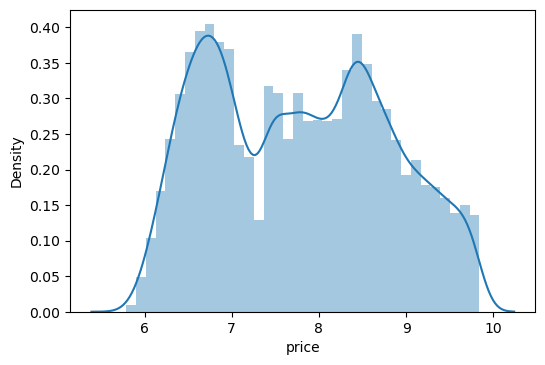

In [78]:
sns.distplot(df3['price'])
#Somewhat normally distributed

<AxesSubplot:>

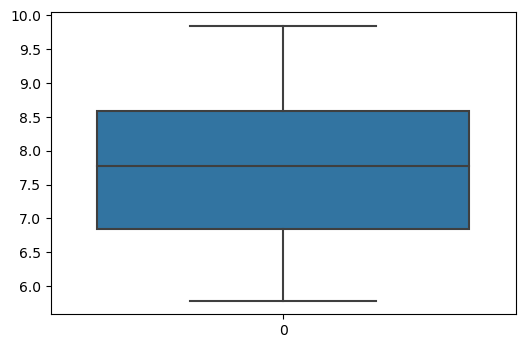

In [79]:
sns.boxplot(data=df3['price'])
#No outliers

In [80]:
df3.duplicated().sum()

34

In [81]:
df3.drop_duplicates(inplace=True)

In [82]:
df3.duplicated().sum()

0

In [83]:
df3.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [84]:
df3['depth'] = np.where(df3['depth'].isnull() == True , df3['depth'].mean(), df3['depth'] )

In [85]:
df3['x']=np.where(df3['x'] == 0,df3['x'].mean(),df3['x'])
df3['y']=np.where(df3['y'] == 0,df3['y'].mean(),df3['y'])
df3['z']=np.where(df3['z'] == 0,df3['z'].mean(),df3['z'])
#Impute X,Y,Z columns with respective columns mean where ever the values are zero.

<AxesSubplot:>

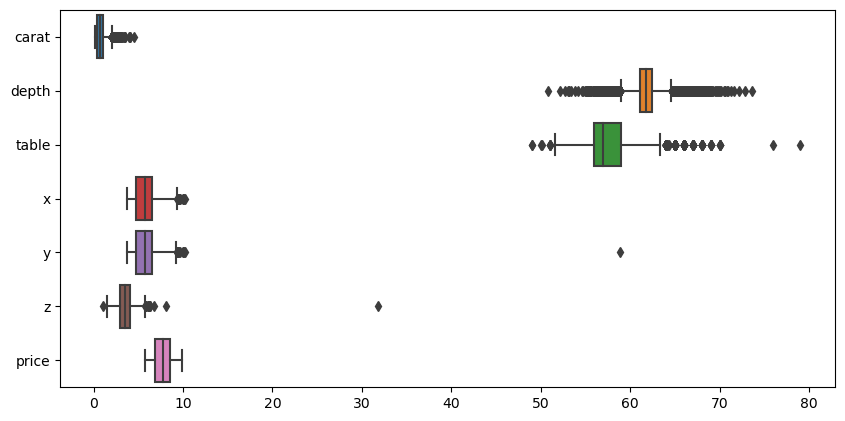

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df3,orient='h')

In [87]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(df3[col],[25,75])
    IQR=Q3-Q1
    Qmax=Q3 + 1.5*IQR
    Qmin=Q1 - 1.5*IQR
    df3[col]= np.where(df3[col] > Qmax, Qmax, df3[col] )
    df3[col]= np.where(df3[col] < Qmin, Qmin, df3[col] )

    #Defining a function to treat outliers

In [88]:
for col in df3.columns:
    if df3[col].dtype != 'object':
        outlier_treatment(col)

#Depth column has not been treated by the function. We will separately treat it.

<AxesSubplot:>

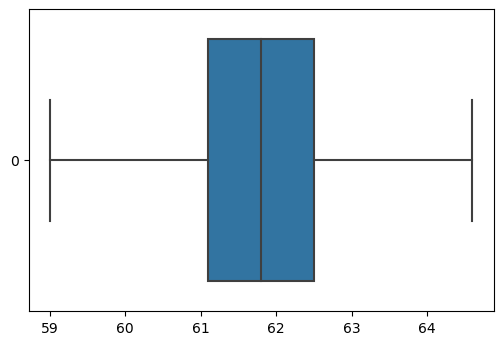

In [89]:
sns.boxplot(data=df3['depth'],orient='h')

In [90]:
Q1,Q3=df3['depth'].quantile(0.25),df3['depth'].quantile(0.75)
IQR=Q3-Q1
Qmax=Q3 + 1.5*IQR
Qmin=Q1 - 1.5*IQR
df3['depth']= np.where(df3['depth'] > Qmax, Qmax, df3['depth'] )
df3['depth']= np.where(df3['depth'] < Qmin, Qmin, df3['depth'] )

<AxesSubplot:>

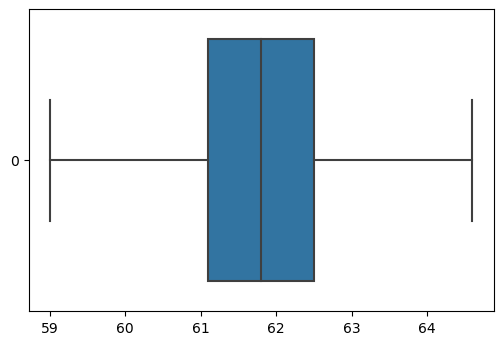

In [91]:
sns.boxplot(data=df3['depth'],orient='h')
#No outliers.

<AxesSubplot:>

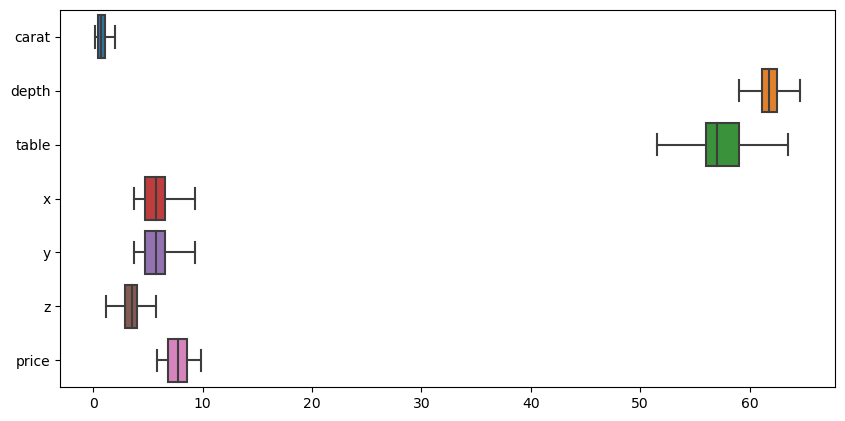

In [92]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df3,orient='h')

In [93]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  object 
 2   color    26933 non-null  object 
 3   clarity  26933 non-null  object 
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.3+ MB


In [94]:
for col in df3.columns: 
    if df3[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df3[col].unique()))
        print(pd.Categorical(df3[col].unique()).codes)
        df3[col] = pd.Categorical(df3[col]).codes



Column Name: cut
['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
[2 3 4 1 0]


Column Name: color
['E', 'G', 'F', 'D', 'H', 'J', 'I']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
[1 3 2 0 4 6 5]


Column Name: clarity
['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']
[2 1 7 4 6 5 3 0]


<AxesSubplot:>

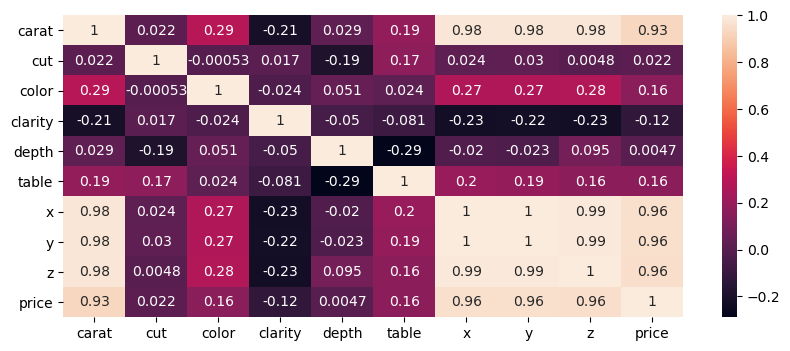

In [95]:
plt.figure(figsize=(10,4))
sns.heatmap(df3.corr(),annot=True)
#Multicollinearity is existing.

In [96]:
X1=df3.copy()
X1.drop('price',axis=1,inplace=True)
Y1=df3.pop('price')

In [97]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=.30,random_state=0)

In [98]:
data_train1=pd.concat([X_train1,y_train1],axis=1)
#Concating and Calculating the same using STATSMODEL
data_train1.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
8747,1.19,2,1,3,60.2,57.0,6.84,6.87,4.13,8.651199
13821,0.36,2,0,5,61.0,56.0,4.63,4.59,2.81,6.997596
13582,1.20,1,5,2,63.1,58.0,6.66,6.72,4.22,8.466321
9952,0.24,4,1,6,60.7,60.0,4.01,4.06,2.45,6.184149
25530,0.50,4,2,7,61.8,56.0,5.11,5.15,3.17,7.626570


In [99]:
#With various permutation and combination I got this results with gives us the best accuracy along with the least VIF scores.
#Making model mentioning all the features gave us the result of 95.1 percent but gave very high VIF value as well
#Hence chose above features to get the most optimum results
lm3 = smf.ols(formula='price ~ color + clarity + x ',data=data_train1).fit()

In [100]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                 1.127e+05
Date:                Mon, 24 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:05:05   Log-Likelihood:                 635.06
No. Observations:               18853   AIC:                            -1262.
Df Residuals:                   18849   BIC:                            -1231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4524      0.011    230.799      0.0

In [101]:
lm3.params

Intercept    2.452438
color       -0.070634
clarity      0.061969
x            0.920610
dtype: float64

In [102]:
vif2=[variance_inflation_factor(data_train1[['color','clarity','x']].values,ix) 
 for ix in range(data_train1[['color','clarity','x']].shape[1])]

In [103]:
clf3=LinearRegression()

In [104]:
i=0
for column in data_train1[['color','clarity','x']].columns:
    if i < 5:
        print (column , "---> ", vif2[i])
        i=i+1
#VIF is not very high

color --->  3.654174232574307
clarity --->  4.340332635216736
x --->  6.693204279345197


In [105]:
X_train2=X_train1.copy()
X_train2.drop(['carat','cut','depth','table','y','z'],axis=1,inplace=True)
X_test2=X_test1.copy()
X_test2.drop(['carat','cut','depth','table','y','z'],axis=1,inplace=True)

In [106]:
clf3.fit(X_train2,y_train1)

LinearRegression()

In [107]:
clf3.score(X_train2,y_train1) #Training set accuracy

0.9472081247487468

In [108]:
clf3.score(X_test2,y_test1) #Testing set accuracy 

0.9468039003309685

In [109]:
mse_test1=np.mean((clf3.predict(X_test2)-y_test1)**2)
mse_train1=np.mean(clf3.predict(X_train2)-y_train1)**2

In [110]:
print('Root mean squared error for Test set is',math.sqrt(mse_test1))
print('Root mean squared error for Training set is',math.sqrt(mse_train1))

Root mean squared error for Test set is 0.23573060618431754
Root mean squared error for Training set is 2.5157124920164795e-16


In [111]:
clf3.intercept_

2.4524377100425196

In [112]:
for idx,col_name in enumerate(X_train2.columns):
    print('The coefficient for {}  is {} '.format(col_name,clf3.coef_[idx]))

The coefficient for color  is -0.07063375156154 
The coefficient for clarity  is 0.061969302562765255 
The coefficient for x  is 0.9206095882387275 


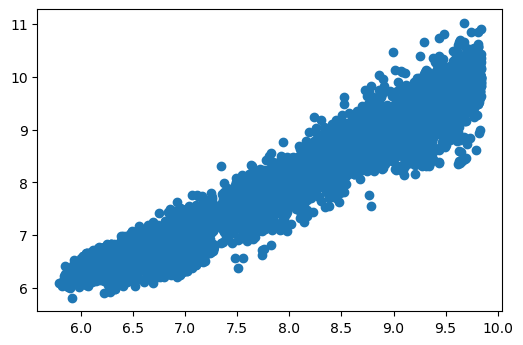

In [113]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_train1,clf3.predict(X_train2)) #Scatter plot for training set

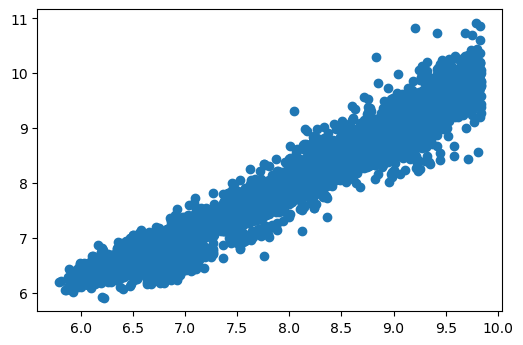

In [114]:
plt.rcParams['figure.dpi']=100
plt.scatter(y_test1,clf3.predict(X_test2)) #Scatter plot for testing set

# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

## The linear equation that is formed using coefficients and intercept is :-

The coefficient for color is -0.07063375156153978

The coefficient for clarity is 0.0619693025627653

The coefficient for x is 0.9206095882387271

The intercept is 2.45243

## log (Price) = -0.0706 color + 0.0619clarity + 0.9206*x + 2.4524
## math.exp(Price) can be used to get the actual price

## Inference

1. The linear regression equation that we form is log (Price) = -0.0706 color + 0.0619clarity + 0.9206x + 2.4524 or Price =e^ (-0.0706 color + 0.0619clarity + 0.9206x + 2.4524).

2. Looking into the equation, we can say that the x variable which is the length of the zirconia is the most important factor for deciding the price.

3.  As there’s a good positive correlation between carat, x, y, z we can say that all the features are of utmost important to determine price. As if any of the features get deteriorated, it will going to affect the other correlated features, resulting in effecting the price.

4. Clarity has also a major role in deciding the price of zirconia.


## SUGGESTIONS

1. From looking at the countplot of clarity , we can see that the production of high clarity zirconia is less. There’s no zirconia with FL remarks. Moreover zirconia with IF, VVS1, VVS2 labels are less. Company should try to provide clearer zirconia as it directly impacts the price.

2. As the price of zirconia is hugely dependent on x & x and carat is highly correlated. The company should try to manufacture high carat zirconia to get better price.

3. The price of Premium and Fair cut is maximum. Hence we should try to maximize the manufacturing of zirconia with such cuts.

<AxesSubplot:xlabel='cut', ylabel='price'>

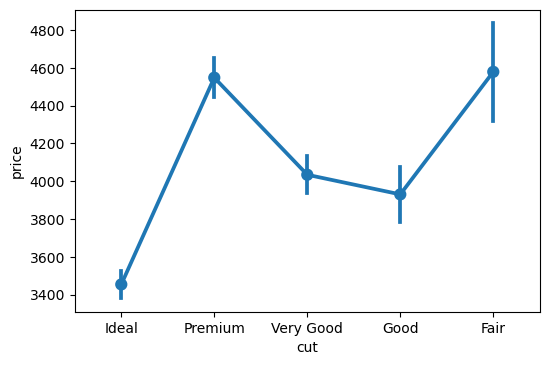

In [130]:
sns.pointplot(x=df1['cut'],y=df1['price'])

# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [131]:
df2.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [132]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [133]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [134]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0


In [135]:
df2.isnull().sum() 

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [136]:
df2.duplicated().sum()

0

In [199]:
df2.rename(columns={'Holliday_Package':'Holiday_Package'},inplace=True) #Renamed column

In [164]:
df2['Holiday_Package'].value_counts()  #Not a class imbalance problem

no     471
yes    401
Name: Holiday_Package, dtype: int64

In [139]:
df2['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64

In [140]:
df2['no_older_children'].value_counts()

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [141]:
df2['no_young_children'].value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [142]:
df2['no_older_children']=np.where(df2['no_older_children'] > 2, '>2', df2['no_older_children']  ) 
df2['no_young_children']=np.where(df2['no_young_children'] > 1, '>1', df2['no_young_children']  ) 

#Creating a new category no_older_children > 2 and no_young_children > 1 as '>2' and '>1' respectively.

# EDA

## Univariate:

### Continous variables:

In [143]:
print('Range of values: ', df2['Salary'].max()-df2['Salary'].min())

Range of values:  235639


In [144]:
print('Minimum Salary: ', df2['Salary'].min())
print('Maximum Salary: ',df2['Salary'].max())
print('Mean value: ', df2['Salary'].mean())
print('Median value: ',df2['Salary'].median())
print('Standard deviation: ', df2['Salary'].std())
print('Null values: ',df2['Salary'].isnull().any())

Minimum Salary:  1322
Maximum Salary:  236961
Mean value:  47729.172018348625
Median value:  41903.5
Standard deviation:  23418.66853107387
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


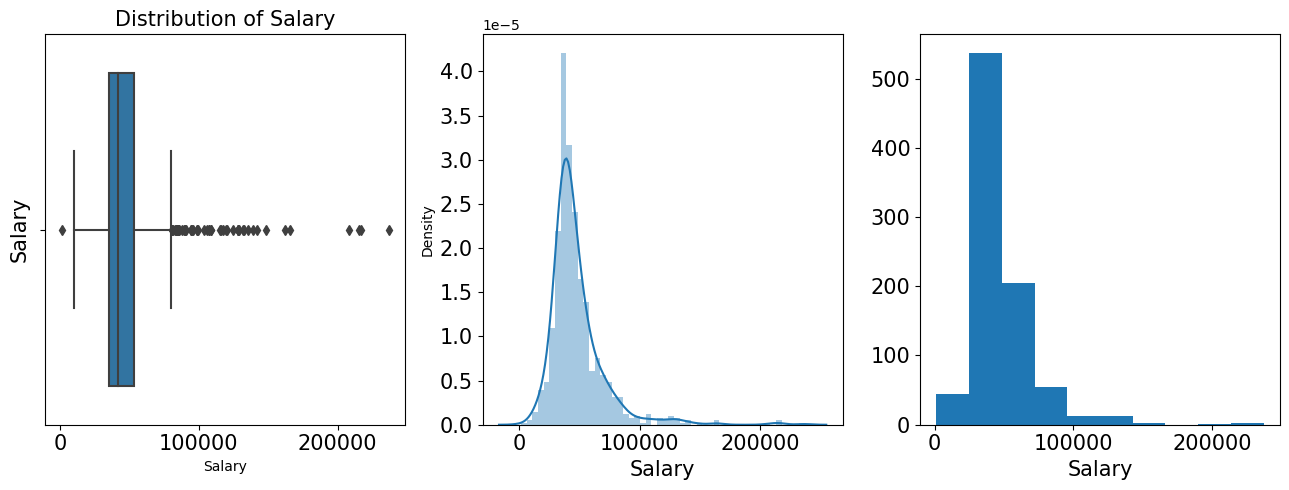

In [145]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Salary',data=df2,orient='v',ax=ax1)
ax1.set_ylabel('Salary', fontsize=15)
ax1.set_title('Distribution of Salary', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df2['Salary'],ax=ax2)
ax2.set_xlabel('Salary', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['Salary'])
ax3.set_xlabel('Salary', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [146]:
print('Range of values: ', df2['age'].max()-df2['age'].min())

Range of values:  42


In [147]:
print('Minimum age: ', df2['age'].min())
print('Maximum age: ',df2['age'].max())
print('Mean value: ', df2['age'].mean())
print('Median value: ',df2['age'].median())
print('Standard deviation: ', df2['age'].std())
print('Null values: ',df2['age'].isnull().any())

Minimum age:  20
Maximum age:  62
Mean value:  39.955275229357795
Median value:  39.0
Standard deviation:  10.551674590487607
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


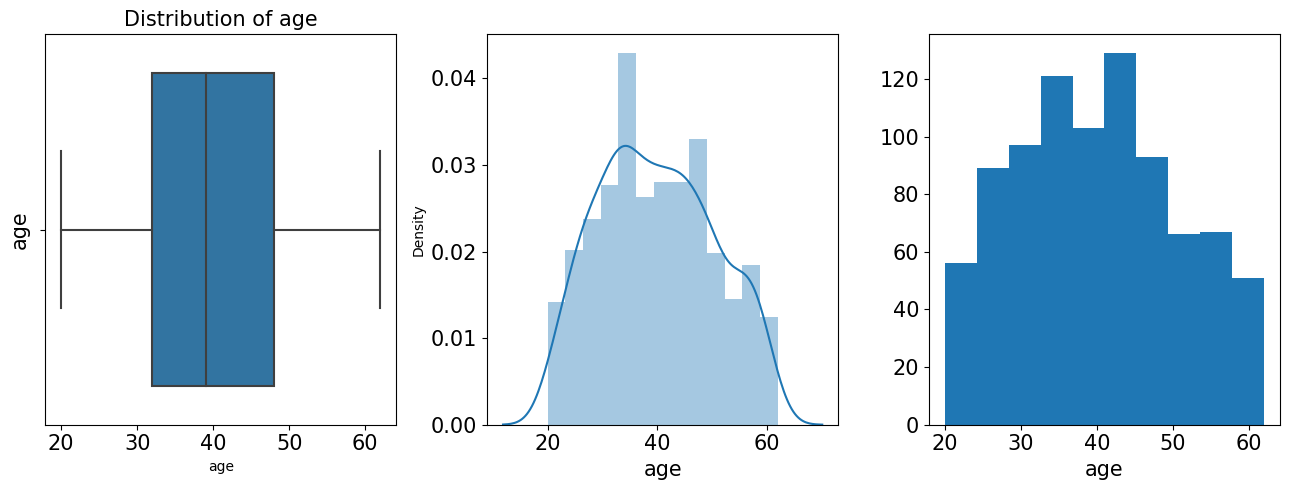

In [148]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df2,orient='v',ax=ax1)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df2['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [149]:
print('Range of values: ', df2['educ'].max()-df2['educ'].min())

Range of values:  20


In [150]:
print('Minimum educ: ', df2['educ'].min())
print('Maximum educ: ',df2['educ'].max())
print('Mean value: ', df2['educ'].mean())
print('Median value: ',df2['educ'].median())
print('Standard deviation: ', df2['educ'].std())
print('Null values: ',df2['educ'].isnull().any())

Minimum educ:  1
Maximum educ:  21
Mean value:  9.307339449541285
Median value:  9.0
Standard deviation:  3.0362586930870448
Null values:  False


C:\Users\randy\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\randy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


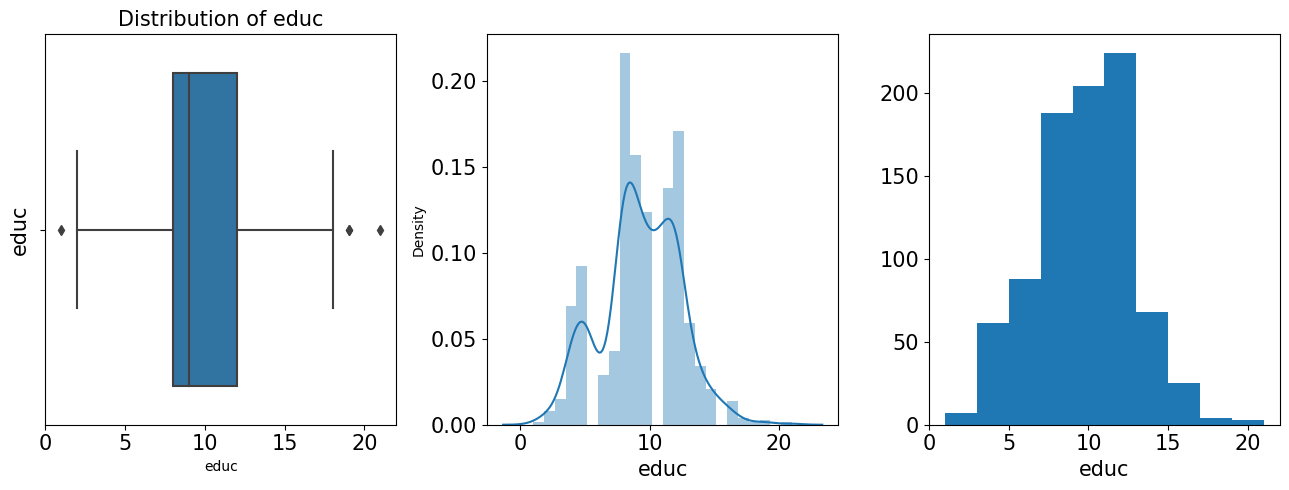

In [151]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='educ',data=df2,orient='v',ax=ax1)
ax1.set_ylabel('educ', fontsize=15)
ax1.set_title('Distribution of educ', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df2['educ'],ax=ax2)
ax2.set_xlabel('educ', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df2['educ'])
ax3.set_xlabel('educ', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [152]:
#  skewness values quantitatively
df2.skew().sort_values(ascending=False)

Salary    3.103216
age       0.146412
educ     -0.045501
dtype: float64

### Categorical Variables:

<AxesSubplot:xlabel='Holiday_Package', ylabel='no_young_children'>

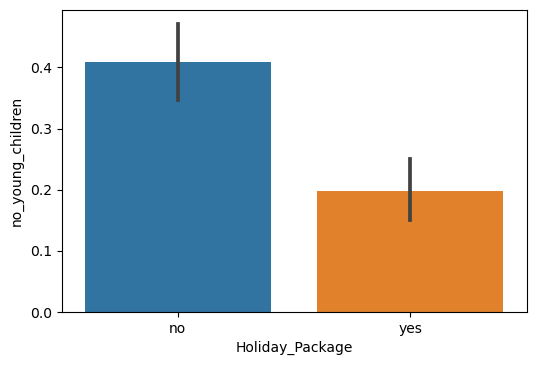

In [165]:
sns.barplot(y=df2['no_young_children'],x=df2['Holiday_Package'])
#People which have lower number of young children has opted for package more compared to those having greater number of
#children.

<AxesSubplot:xlabel='Holiday_Package', ylabel='no_older_children'>

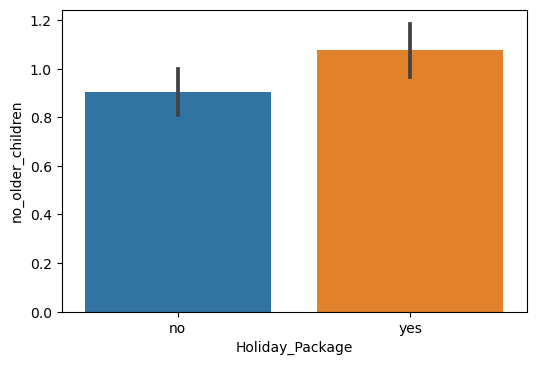

In [166]:
sns.barplot(y=df2['no_older_children'],x=df2['Holiday_Package'])
#People which have higher number of older children has opted for package more compared to those having smaller number of
# young children.

<AxesSubplot:xlabel='Holiday_Package', ylabel='educ'>

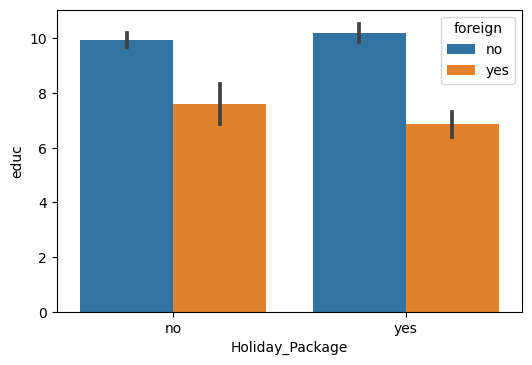

In [167]:
sns.barplot(y=df2['educ'],x=df2['Holiday_Package'],hue=df2['foreign'])
#Out of all the customers, whose who have chosen the holiday package, most of them are non-foreigners

<AxesSubplot:xlabel='Holiday_Package', ylabel='age'>

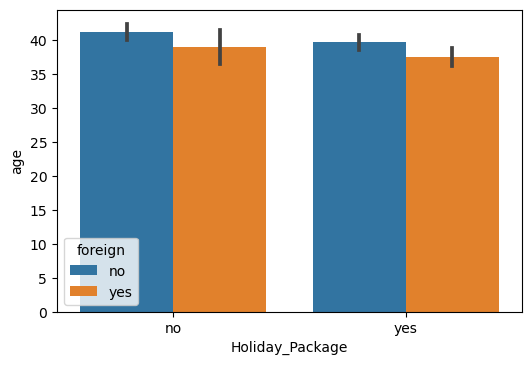

In [156]:
sns.barplot(y=df2['age'],x=df2['Holiday_Package'],hue=df2['foreign'])
#Indian individuals have opted for holiday package more as compared to foreign individuals.Although the difference is very
#small

<AxesSubplot:xlabel='Holiday_Package', ylabel='educ'>

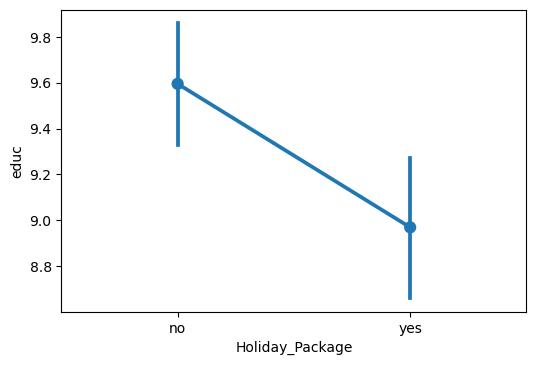

In [157]:
sns.pointplot(y=df2['educ'],x=df2['Holiday_Package'])
#The guys whose education is little less have opted for package more as compared to those who have higher education

C:\Users\randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_older_children', ylabel='count'>

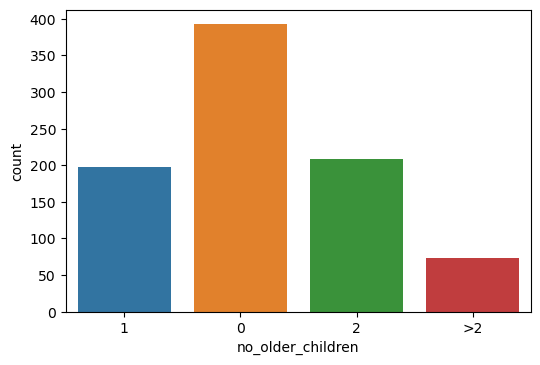

In [158]:
sns.countplot(df2['no_older_children'])

C:\Users\randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_young_children', ylabel='count'>

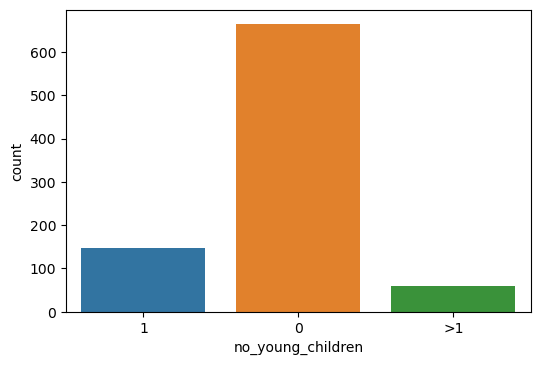

In [159]:
sns.countplot(df2['no_young_children'])

In [168]:
df2['Holiday_Package'].value_counts() #Not a class imbalance problem. And both the classes are equally represented

no     471
yes    401
Name: Holiday_Package, dtype: int64

## Multivariate Analysis

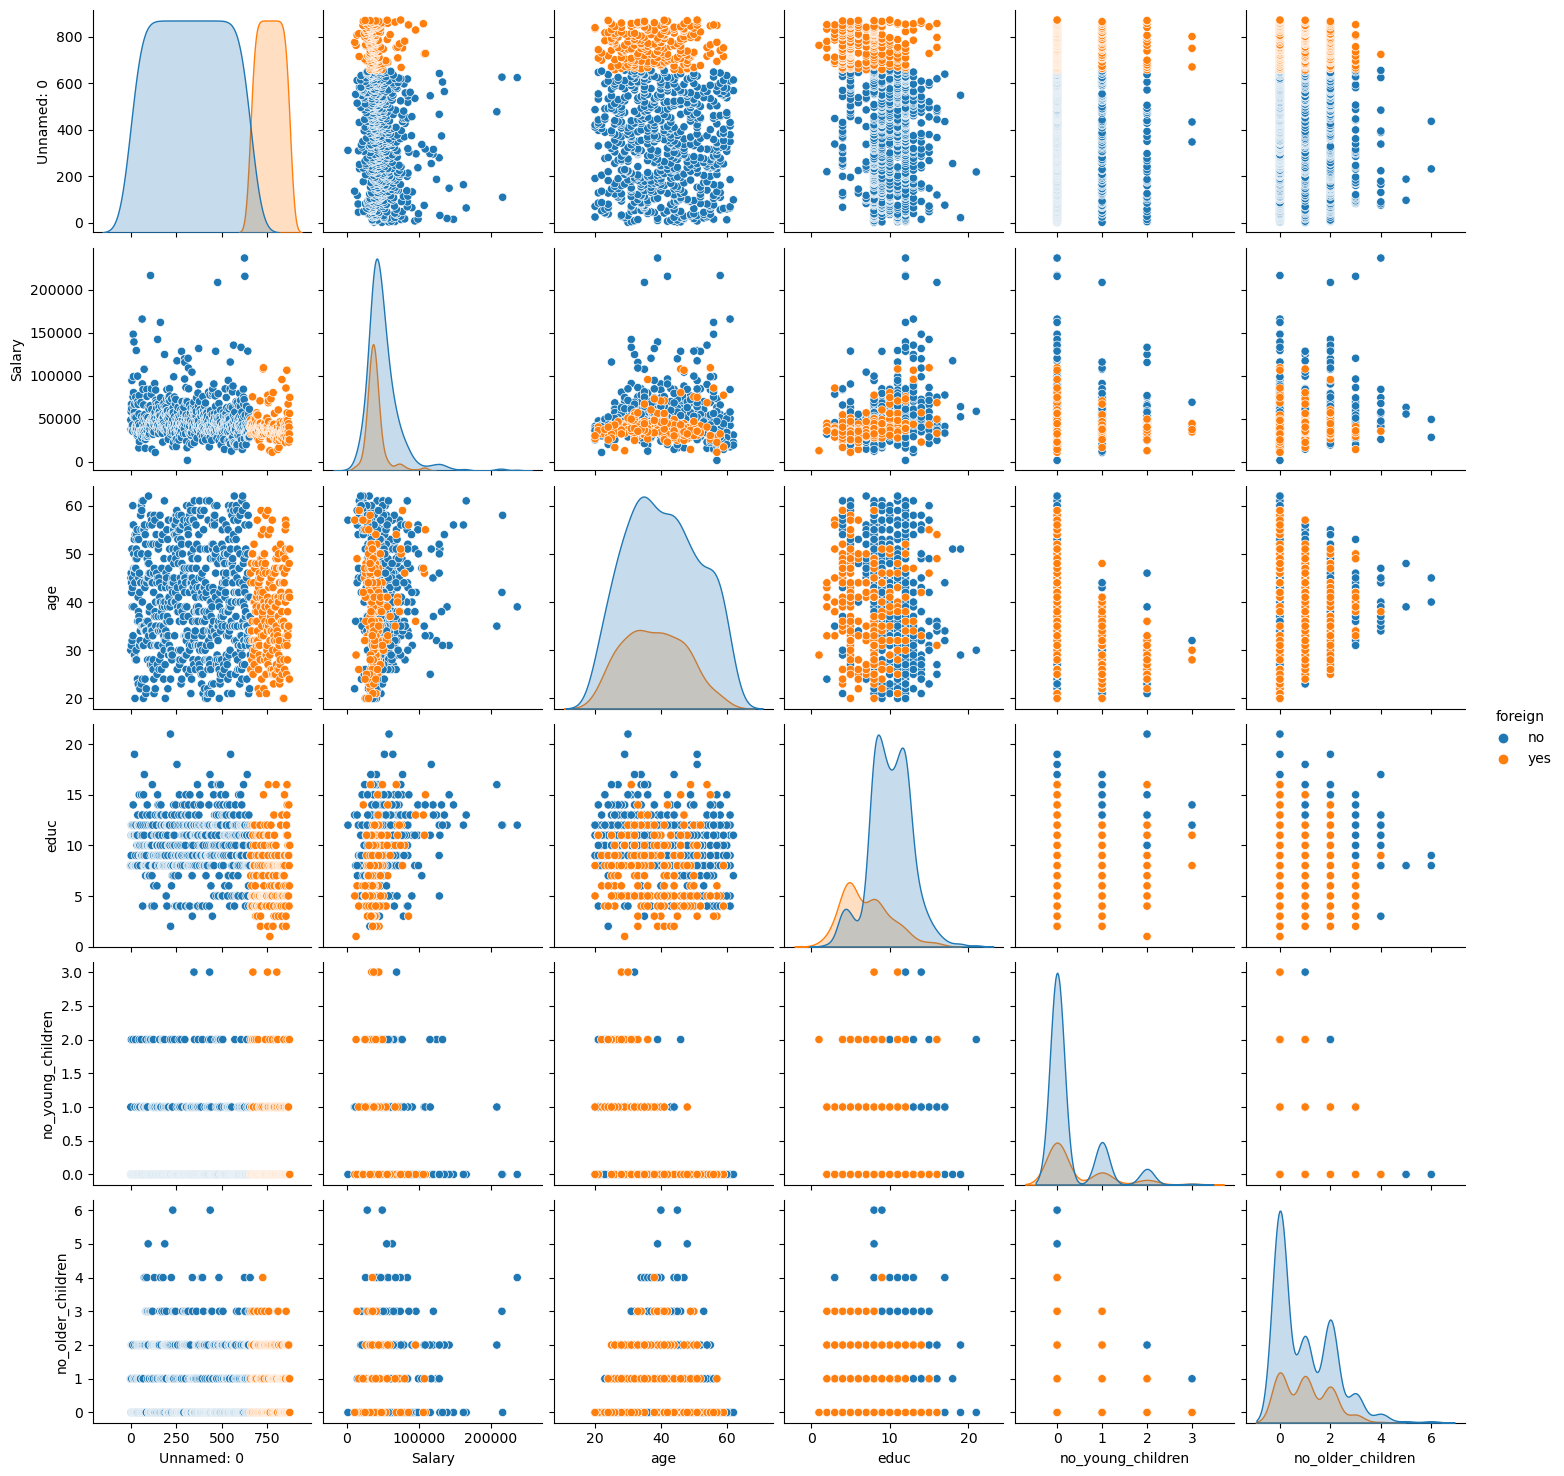

In [118]:
sns.pairplot(data=df2,diag_kind='kde',hue='foreign')
#Eyeballing on the data,we see there's no such features which completely separate two required classes. There's an overlap
#between every features .But still features such as Salary and educ can be slightly useful for separating classes 

<AxesSubplot:>

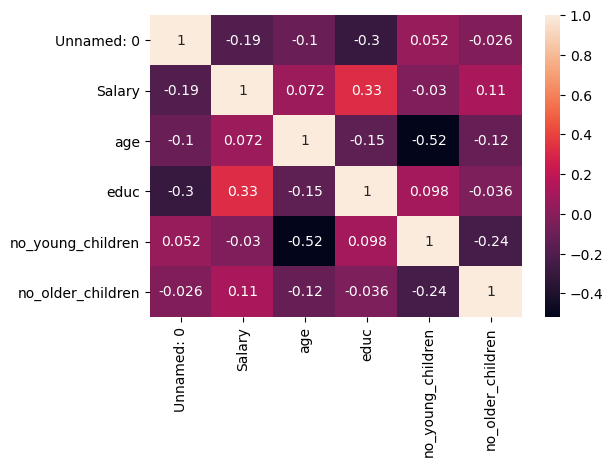

In [119]:
sns.heatmap(df2.corr(),annot=True)
#No good correlations to be seen in a heatmap.

In [120]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


<AxesSubplot:>

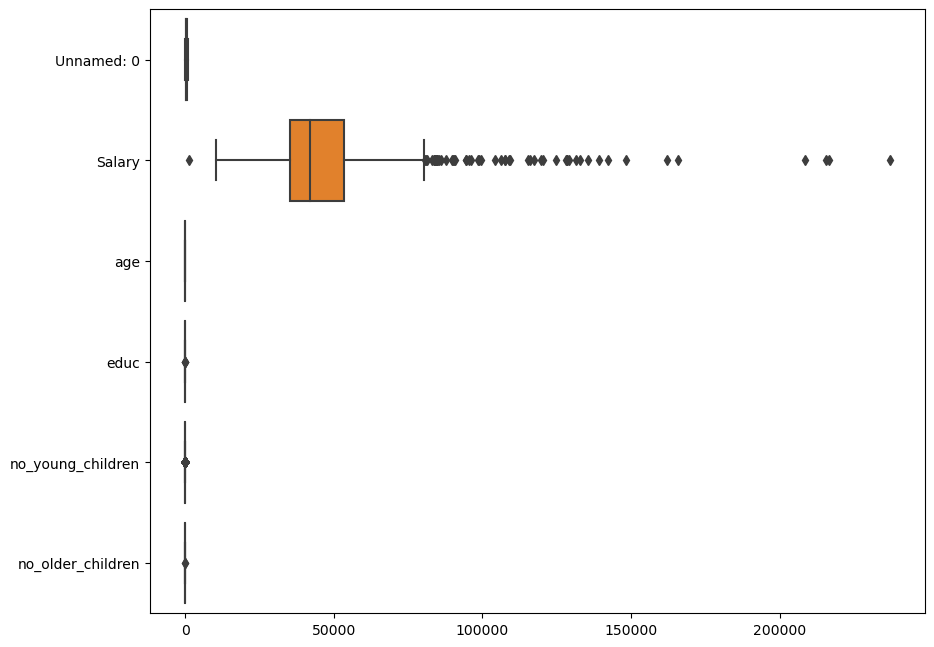

In [121]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df2,orient='h')
#Outliers are there.

In [122]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(df2[col],[25,75])
    IQR=Q3-Q1
    Qmax=Q3 + 1.5*IQR
    Qmin=Q1 - 1.5*IQR
    df2[col]= np.where(df2[col] > Qmax, Qmax, df2[col] )
    df2[col]= np.where(df2[col] < Qmin, Qmin, df2[col ] )

    #Defining a function to treat outliers

In [123]:
outlier_treatment('Salary')
outlier_treatment('educ')
#Treating outliers for features Salary and Educ only.

<AxesSubplot:>

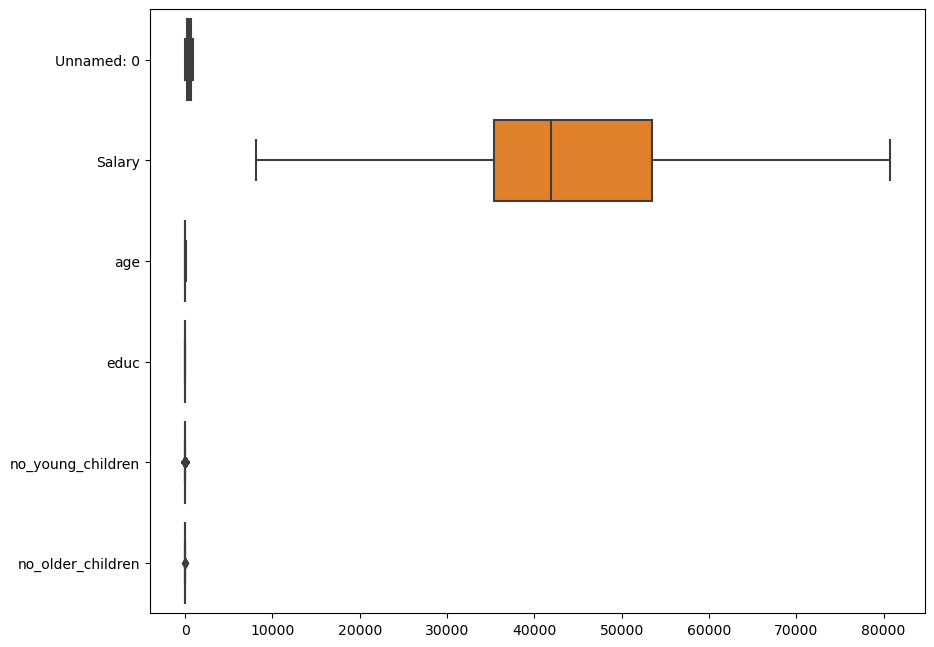

In [124]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df2,orient='h')
#No more outliers present

In [169]:
for col in df2.columns: 
    if df2[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df2[col].unique()))
        print(pd.Categorical(df2[col].unique()).codes)
        df2[col] = pd.Categorical(df2[col]).codes

        #Changing the datatype and assigning codes to each category.



Column Name: Holiday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


Column Name: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [170]:
df2.info()
#Datatype succefully changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Unnamed: 0         872 non-null    int64
 1   Holiday_Package    872 non-null    int8 
 2   Salary             872 non-null    int64
 3   age                872 non-null    int64
 4   educ               872 non-null    int64
 5   no_young_children  872 non-null    int64
 6   no_older_children  872 non-null    int64
 7   foreign            872 non-null    int8 
dtypes: int64(6), int8(2)
memory usage: 42.7 KB


# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [171]:
X=df2.copy()
X.drop('Holiday_Package',axis=1,inplace=True)
Y=df2.pop('Holiday_Package')
#Creating new dataset containing IV and DV in it

In [172]:
X.head()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,48412,30,8,1,1,0
1,2,37207,45,8,0,1,0
2,3,58022,46,9,0,0,0
3,4,66503,31,11,2,0,0
4,5,66734,44,12,0,2,0


In [173]:
X_train,X_test,train_labels,test_labels,=train_test_split(X,Y,test_size=0.30,random_state=1)
#Spltting the data into training and testing dataset

In [174]:
clf=LogisticRegression()

In [175]:
clf.fit(X_train,train_labels)
#Fitting the Trained Model into training dataset

LogisticRegression()

# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [176]:
ytrain_predict=clf.predict(X_train)
#Predicing using the model trained on training dataset

<AxesSubplot:>

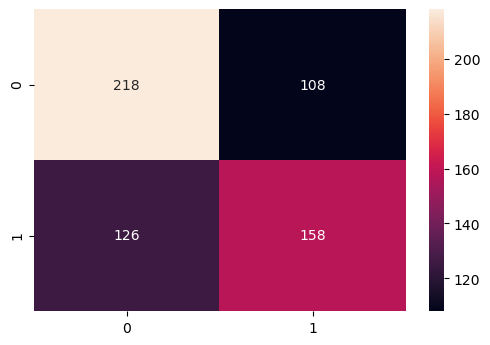

In [177]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True,fmt='g')

In [178]:
print(classification_report(train_labels,ytrain_predict))
#Accuracy is poor. Along with it recall is very poor

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       326
           1       0.59      0.56      0.57       284

    accuracy                           0.62       610
   macro avg       0.61      0.61      0.61       610
weighted avg       0.62      0.62      0.62       610



In [179]:
ytest_predict=clf.predict(X_test)
#Predicting using X_test

<AxesSubplot:>

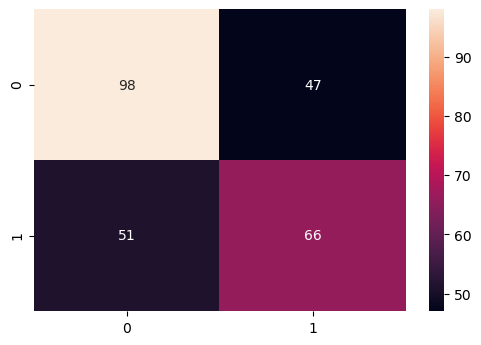

In [180]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True,fmt='g')
#Number of False negative is very high . Which proves this model is not at all suitable as it incorrectly determines our
#potential customers.

In [181]:
print(classification_report(test_labels,ytest_predict))
#Poor results as that of testing dataset

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       145
           1       0.58      0.56      0.57       117

    accuracy                           0.63       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.62      0.63      0.63       262



In [182]:
from sklearn.metrics import roc_auc_score,roc_curve

In [183]:
probs1=clf.predict_proba(X_train)
probs1=probs1[:,1]
roc_auc_score(train_labels,probs1)

0.6366110775079927

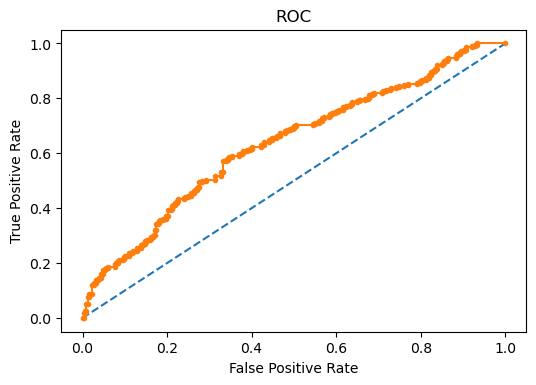

In [184]:
fpr,tpr,thresholds=roc_curve(train_labels,probs1)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

In [185]:
probs2=clf.predict_proba(X_test)
probs2=probs2[:,1]
roc_auc_score(test_labels,probs2)

0.6491600353669318

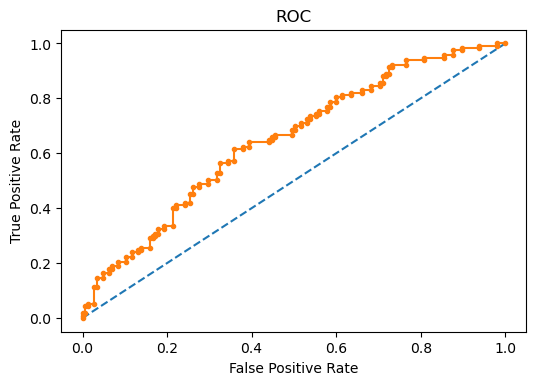

In [186]:
fpr,tpr,thresholds=roc_curve(test_labels,probs2)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()

#AUC score is poor and ROC curve poorly plotted 

In [187]:
#Making of LDA model

lda=LinearDiscriminantAnalysis(tol=0.00001,solver='svd')
model=lda.fit(X_train,train_labels)
model 
#Fitting lda model on training data.

LinearDiscriminantAnalysis(tol=1e-05)

<AxesSubplot:>

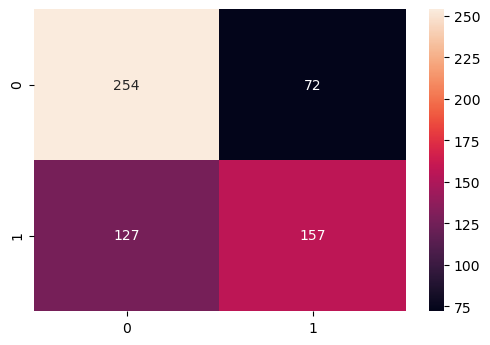

In [188]:
sns.heatmap(confusion_matrix(train_labels,model.predict(X_train)),annot=True,fmt='g')
#LDA performing comparatively better than Logistic Regression model

In [189]:
print(classification_report(train_labels,model.predict(X_train)))
#Accuracy,Recall is higher as compared to Logistic Model

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.55      0.61       284

    accuracy                           0.67       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.67      0.67       610



<AxesSubplot:>

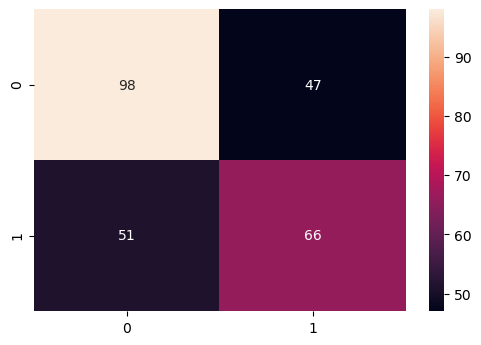

In [190]:
sns.heatmap(confusion_matrix(test_labels,model.predict(X_test)),annot=True,fmt='g')
#Confusion matrix for Testing data gives similar result as training data.

In [191]:
print(classification_report(test_labels,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67       145
           1       0.58      0.56      0.57       117

    accuracy                           0.63       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.62      0.63      0.63       262



In [192]:
probs1_lda=lda.predict_proba(X_train)
probs1_lda=probs1_lda[:,1]
roc_auc_score(train_labels,probs1_lda)
#roc_auc_score for training dataset

0.746014430139117

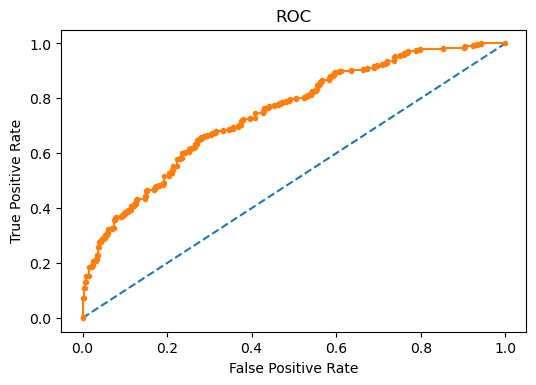

In [193]:
fpr,tpr,thresholds=roc_curve(train_labels,probs1_lda)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()
#ROC curve for Training set

In [194]:
probs2_lda=lda.predict_proba(X_test)
probs2_lda=probs2_lda[:,1]
roc_auc_score(test_labels,probs2_lda)
#roc_auc_score for testing dataset

0.6966106690244621

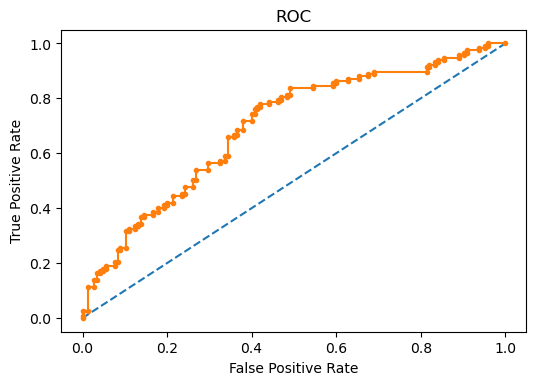

In [195]:
fpr,tpr,thresholds=roc_curve(test_labels,probs2_lda)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.show()
#ROC curve for Testing set

### AUC score is good and ROC curve is better plotted as compared to Logistic Model.
## Looking into all the important parameters such as Accuracy, Recall, AUC score and ROC curve , LDA is performing better as compared to Logistic Regression model

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

 ## INSIGHTS
1. Looking into all the important parameters such as Accuracy, Recall, AUC score and ROC curve, LDA is performing better as compared to Logistic Regression mode.

2. But the accuracy that we are getting is still not good to make any predictions. Hence we should try some more models such as neural networks, random forests to choose the optimum model for our predictions.

3. We should try to gather some more data to make the model better and more robust.

4. We can change outlier treatment techniques such as scaling the data and treating those values which are above and below +3 & -3 SD respectively. It was not done here as we were not asked to scale the data

C:\Users\randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday_Package', ylabel='Salary'>

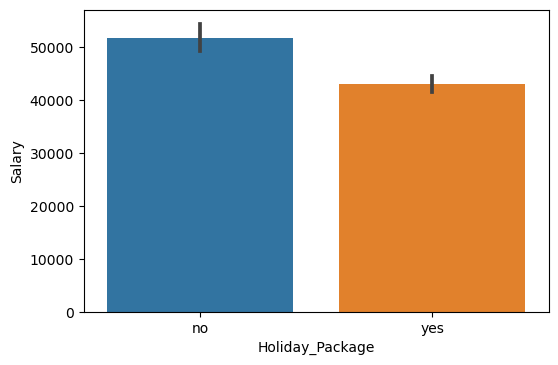

In [200]:
sns.barplot(df2['Holiday_Package'],df2['Salary'])